In [1]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [2]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

In [61]:
D = nx.DiGraph()

In [62]:
from google.colab import files
uploaded1 = files.upload()

Saving democrats_mentions_edges.csv to democrats_mentions_edges (1).csv


In [63]:
with open('democrats_mentions_edges.csv', 'r') as f:
  reader = csv.reader(f)
  next(reader, None)

  for row in f:
    s= row.split(',')
    D.add_edge(s[0], s[1], weight=s[2])

In [64]:
print(nx.info(D))

Name: 
Type: DiGraph
Number of nodes: 226
Number of edges: 2760
Average in degree:  12.2124
Average out degree:  12.2124


In [65]:
density = nx.density(D)
print("Network density:", density)

Network density: 0.054277286135693215


In [66]:
degree_dict = dict(D.degree(D.nodes()))
nx.set_node_attributes(D, degree_dict, 'degree')

In [67]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('SpeakerPelosi', 103)
('LeaderHoyer', 95)
('repjohnlewis', 73)
('RepKClark', 69)
('RepRaskin', 66)
('RepDebHaaland', 64)
('gracenapolitano', 63)
('RepPressley', 59)
('RepHastingsFL', 59)
('RepRashida', 55)
('RepGraceMeng', 54)
('RepJerryNadler', 52)
('RepBarbaraLee', 51)
('WhipClyburn', 49)
('RepJayapal', 48)
('Ilhan', 48)
('RepMaloney', 48)
('JoaquinCastrotx', 47)
('RepKatiePorter', 46)
('RepAOC', 45)


In [68]:
betweenness_dict = nx.betweenness_centrality(D) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(D, betweenness_dict, 'betweenness')

In [69]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('LeaderHoyer', 0.03200249616393591)
('repjohnlewis', 0.022966948541734904)
('RepKClark', 0.01610835474516316)
('RepRaskin', 0.015589273840865718)
('RepPressley', 0.01116179767866827)
('RepDebHaaland', 0.011010341157498554)
('RepRashida', 0.010795986335433041)
('WhipClyburn', 0.010123782086462094)
('RepHastingsFL', 0.009507896292023938)
('BillPascrell', 0.009026938717617202)
('RepGraceMeng', 0.008779201978627827)
('Ilhan', 0.008192312452010402)
('RepMaxRose', 0.007776457084758584)
('RepYvetteClarke', 0.007360059679866972)
('RepSherrill', 0.007290059963325905)
('RepAnnieKuster', 0.007276115207880421)
('RepJerryNadler', 0.007235060863308199)
('RepFletcher', 0.007118180001973076)
('RepMaloney', 0.007092768771380406)
('SpeakerPelosi', 0.007076973306924315)


In [70]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: LeaderHoyer | Betweenness Centrality: 0.03200249616393591 | Degree: 95
Name: repjohnlewis | Betweenness Centrality: 0.022966948541734904 | Degree: 73
Name: RepKClark | Betweenness Centrality: 0.01610835474516316 | Degree: 69
Name: RepRaskin | Betweenness Centrality: 0.015589273840865718 | Degree: 66
Name: RepPressley | Betweenness Centrality: 0.01116179767866827 | Degree: 59
Name: RepDebHaaland | Betweenness Centrality: 0.011010341157498554 | Degree: 64
Name: RepRashida | Betweenness Centrality: 0.010795986335433041 | Degree: 55
Name: WhipClyburn | Betweenness Centrality: 0.010123782086462094 | Degree: 49
Name: RepHastingsFL | Betweenness Centrality: 0.009507896292023938 | Degree: 59
Name: BillPascrell | Betweenness Centrality: 0.009026938717617202 | Degree: 34
Name: RepGraceMeng | Betweenness Centrality: 0.008779201978627827 | Degree: 54
Name: Ilhan | Betweenness Centrality: 0.008192312452010402 | Degree: 48
Name: RepMaxRose | Betweenness Centrality: 0.007776457084758584 | Degre

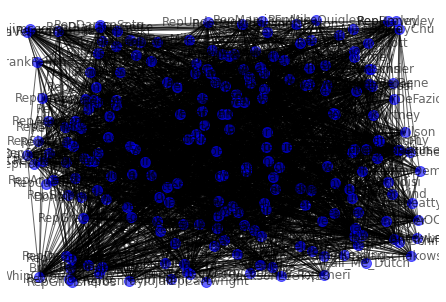

In [71]:
nx.draw_random(D, with_labels=True, node_color='b',
        node_size=100, arrows=False, alpha=0.6)
plt.show()

In [40]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes


In [41]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(D)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(D)[node] == max(nx.betweenness_centrality(D).values())


{'SteveScalise'}


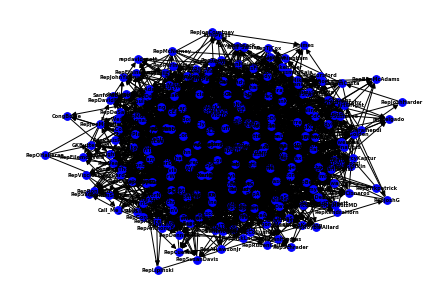

In [72]:
nx.draw(D, pos = nx.nx_pydot.graphviz_layout(D), node_size=60, node_color='blue', \
    linewidths=0.99, font_size=5, font_weight='bold', with_labels=True)
plt.show()

In [48]:
R = nx.DiGraph()

In [49]:
from google.colab import files
uploaded2 = files.upload()

Saving republican_mentions_edges.csv to republican_mentions_edges.csv


In [50]:
with open('republican_mentions_edges.csv', 'r') as f:
  reader = csv.reader(f)
  next(reader, None)

  for row in f:
    s= row.split(',')
    R.add_edge(s[0], s[1], weight=s[2])

In [51]:
print(nx.info(R))

Name: 
Type: DiGraph
Number of nodes: 196
Number of edges: 1794
Average in degree:   9.1531
Average out degree:   9.1531


In [52]:
density = nx.density(R)
print("Network density:", density)

Network density: 0.04693877551020408


In [53]:
degree_dict = dict(R.degree(R.nodes()))
nx.set_node_attributes(R, degree_dict, 'degree')

In [54]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('GOPLeader', 122)
('SteveScalise', 108)
('RepKenBuck', 66)
('RepTimBurchett', 54)
('RepLizCheney', 52)
('TXRandy14', 46)
('RepJackBergman', 44)
('RepRonWright', 41)
('HerreraBeutler', 39)
('RepMcCaul', 39)
('RepRichHudson', 38)
('RepCloudTX', 37)
('RepChipRoy', 37)
('RepTomEmmer', 37)
('RepMikeJohnson', 35)
('RepPeteStauber', 35)
('michaelcburgess', 35)
('DrPhilRoe', 34)
('RepAndyBarr', 34)
('RepDLesko', 34)


In [55]:
betweenness_dict = nx.betweenness_centrality(R) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(R, betweenness_dict, 'betweenness')

In [56]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('GOPLeader', 0.07699390178653458)
('SteveScalise', 0.041492049718251385)
('RepKenBuck', 0.011620602725708648)
('RepLizCheney', 0.008226835934638797)
('Jim_Jordan', 0.007839548374273262)
('HerreraBeutler', 0.007035989036354243)
('RepJohnJoyce', 0.006972023514647616)
('RepTomEmmer', 0.006818894331709495)
('RepMcCaul', 0.006792528055775361)
('RepRichHudson', 0.006691371475817492)
('RepRutherfordFL', 0.006650632056805308)
('RodneyDavis', 0.006167691593478873)
('RepRalphNorman', 0.006084010951707214)
('RepTimBurchett', 0.0059519531837554296)
('RepDLesko', 0.005543487648283421)
('RepHartzler', 0.00528477463323271)
('RepRiggleman', 0.004721554826714458)
('RepChipRoy', 0.00468219217418457)
('cathymcmorris', 0.0045645623194265255)
('RepCloudTX', 0.004202240538322387)


In [57]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: GOPLeader | Betweenness Centrality: 0.07699390178653458 | Degree: 122
Name: SteveScalise | Betweenness Centrality: 0.041492049718251385 | Degree: 108
Name: RepKenBuck | Betweenness Centrality: 0.011620602725708648 | Degree: 66
Name: RepLizCheney | Betweenness Centrality: 0.008226835934638797 | Degree: 52
Name: Jim_Jordan | Betweenness Centrality: 0.007839548374273262 | Degree: 30
Name: HerreraBeutler | Betweenness Centrality: 0.007035989036354243 | Degree: 39
Name: RepJohnJoyce | Betweenness Centrality: 0.006972023514647616 | Degree: 26
Name: RepTomEmmer | Betweenness Centrality: 0.006818894331709495 | Degree: 37
Name: RepMcCaul | Betweenness Centrality: 0.006792528055775361 | Degree: 39
Name: RepRichHudson | Betweenness Centrality: 0.006691371475817492 | Degree: 38
Name: RepRutherfordFL | Betweenness Centrality: 0.006650632056805308 | Degree: 33
Name: RodneyDavis | Betweenness Centrality: 0.006167691593478873 | Degree: 30
Name: RepRalphNorman | Betweenness Centrality: 0.00608401

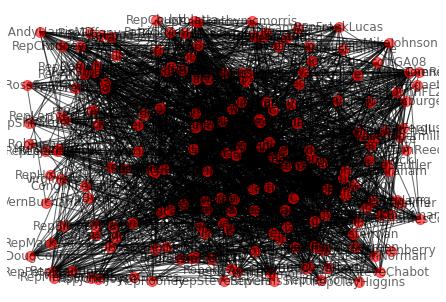

In [58]:
nx.draw_random(R, with_labels=True, node_color='r',
        node_size=100, arrows=False, alpha=0.6)
plt.show()

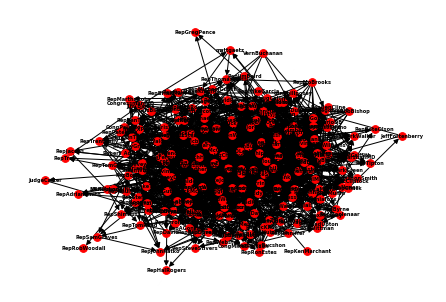

In [59]:
nx.draw(R, pos = nx.nx_pydot.graphviz_layout(R), node_size=60, node_color='red', \
    linewidths=0.99, font_size=5, font_weight='bold', with_labels=True)
plt.show()

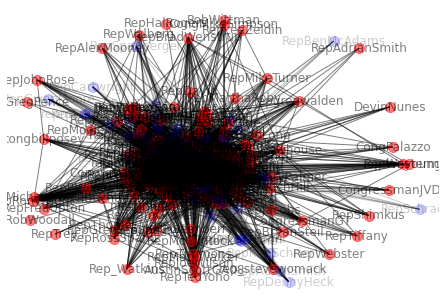

In [74]:
nx.draw(D,pos = nx.draw(R, with_labels=True, node_color='r',
        node_size=100, arrows=False, alpha=0.5), with_labels=True, node_color='b',
        node_size=100, arrows=False, alpha=0.2)
plt.show()